In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def bmi_cal(bmi):
    if 18.5 > bmi:
        return ["underfat", "black"]
    if 18.5 <= bmi < 25:
        return ["healthy", "red"]
    if 25 <= bmi < 30:
        return ["overfat", "green"]
    if 30 <= bmi:
        return ["obese", "blue"]

In [3]:
plt.rcParams["figure.figsize"] = [15,10]
# plt.style.use('ggplot')
# font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 14}

In [4]:
data = pd.read_csv("./data.csv", sep=";", index_col=0)

In [5]:
data

id      pc-1      pc-2      pc-3      pc-4      pc-5      pc-6  \
0     84  0.016810 -0.032489 -0.007898 -0.033773 -0.032584  0.026778   
1     13  0.092262 -0.065713 -0.015826  0.053168  0.001382 -0.012178   
2     70 -0.014963 -0.017224  0.003035  0.001230 -0.007519  0.022449   
3    147 -0.011480 -0.005127 -0.005106  0.013781  0.024068  0.003905   
4     61  0.043858 -0.001369  0.053585 -0.008398 -0.014134  0.009845   
5     46  0.010280 -0.056644  0.032988  0.000247  0.033740  0.017326   
6     71 -0.034877 -0.007307  0.018996 -0.005948 -0.021654  0.017830   
7    150  0.029784  0.047821 -0.056802 -0.018723  0.010530  0.021507   
8    136 -0.028307 -0.050493 -0.046368  0.005173  0.003487  0.002831   
9     97 -0.007127 -0.008439  0.018334 -0.022010 -0.018168  0.029552   
10    41 -0.036719 -0.020994  0.003924  0.015141  0.013622  0.000059   
11   100 -0.037924 -0.006522 -0.023949  0.010109 -0.032368 -0.009435   
12   141  0.028584 -0.041899  0.013806  0.001072 -0.003940 -0.004676   
13    82  0.025956  0.013675 -0.027073 -0.014643 -0.020341  0.008212   
14    43  0.000221  0.070639 -0.026533 -0.027676  0.041772  0.024463   
15    25 -0.041935 -0.032270  0.040090 -0.019316 -0.008127 -0.001448   
16    47 -0.046175 -0.013338 -0.016910  0.013073 -0.002215 -0.012035   
17    73 -0.084711 -0.005715  0.061738 -0.018829  0.001521  0.015977   
18   107 -0.026328  0.011096  0.013937 -0.000936  0.057234 -0.010744   
19   118  0.025658  0.057614 -0.000010 -0.017165 -0.014646  0.034154   
20    11 -0.035772 -0.015802 -0.012353  0.020728 -0.032118  0.013996   
21   137 -0.079739  0.064081  0.009329 -0.013227 -0.003583 -0.011584   
22    17  0.041206 -0.000525 -0.011838 -0.016476  0.028175 -0.032176   
23   127 -0.071183  0.050922 -0.047576  0.021907 -0.023164  0.004818   
24    28  0.018715  0.033217  0.017060  0.024189  0.052095  0.024045   
25   101 -0.026610 -0.021989  0.000318  0.018590 -0.008717 -0.025347   
26    74  0.032022 -0.042559 -0.030484  0.002239  0.026016  0.012508   
27    65 -0.020544 -0.039263  0.023490 -0.017703  0.005637  0.014150   
28    52 -0.020185 -0.047767  0.029128  0.030811 -0.015788  0.007540   
29    81 -0.094109 -0.013268  0.016655 -0.024152  0.008449  0.022401   
..   ...       ...       ...       ...       ...       ...       ...   
83   145 -0.036701  0.033498  0.005522  0.004956 -0.009337 -0.017386   
84   110  0.088764 -0.021973  0.036537  0.009110  0.018327  0.004696   
85    48 -0.035316  0.004129  0.017307 -0.035656 -0.017593 -0.021528   
86    21  0.015543 -0.081639 -0.012841 -0.014696 -0.004744 -0.003073   
87   114 -0.074501  0.019130  0.005767 -0.017080  0.001235  0.001533   
88    59 -0.032421 -0.008033 -0.016380  0.018026 -0.017932 -0.017518   
89     1 -0.025807  0.006716  0.006457  0.061398 -0.031422  0.005694   
90   154 -0.027482 -0.011297 -0.010152  0.006078 -0.026467  0.001501   
91   122  0.050120 -0.018277 -0.047143 -0.032869  0.017015  0.025872   
92    45 -0.018301  0.016054  0.003516  0.013977  0.011631  0.002224   
93     4 -0.013377 -0.051277 -0.015485 -0.048488  0.042270 -0.003628   
94   106  0.011882  0.063265  0.003882  0.021477 -0.021409 -0.012673   
95    54  0.025798 -0.018401 -0.005727 -0.012591  0.019291 -0.022084   
96    30  0.040427  0.064575  0.036998  0.039924 -0.014065  0.006953   
97    15  0.009628 -0.015086  0.031027 -0.000743 -0.006411  0.032782   
98   103 -0.030005 -0.026456 -0.027763  0.025271  0.004087 -0.025384   
99    20 -0.035311 -0.023363 -0.000018  0.009594  0.004932 -0.000076   
100   24  0.019464 -0.007364 -0.003473 -0.017976 -0.006358 -0.016588   
101   34  0.023925 -0.056944 -0.017940  0.003230  0.019146  0.014905   
102   80 -0.053854 -0.005181  0.042985 -0.023308 -0.005325  0.021370   
103   42 -0.053236  0.028983 -0.015084 -0.033919  0.023753 -0.012517   
104   55  0.040821  0.002884  0.043115  0.007879  0.014168  0.026970   
105   53  0.002321  0.048038 -0.019162 -0.013921  0.028637  0.013737   
106   12  0.066694 -0.067100 -0.054534 -0.0318

In [6]:
x_out = np.array(data[data.columns[1:61]])

In [7]:
ids = np.array(data["id"])

In [8]:
sexo = np.array(data["sexo"])

In [9]:
bmi = np.array(data["bmi"])
ict = np.array(data["ict"])
icc = np.array(data["icc"])

In [10]:
bmi_l = np.array(list(map( lambda pa: bmi_cal(pa)  ,bmi)))

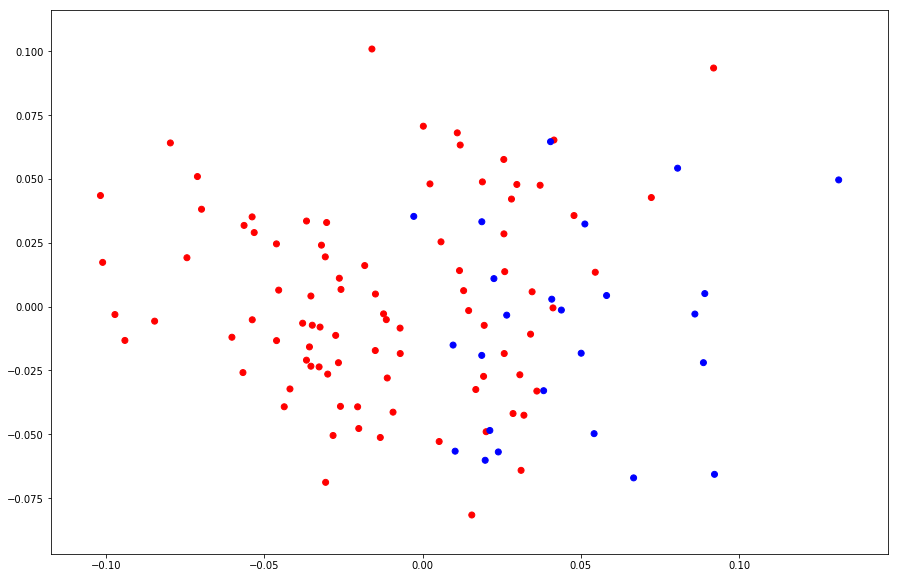

In [11]:
plt.scatter(x_out[:, 0], x_out[:, 1], marker="o", c=sexo)

In [12]:
#centroid_obesity 
centroid_obesity = np.mean(x_out[bmi_l[:,0] =="obese"][:,[0,1]], axis=0)
centroid_healthy = np.mean(x_out[bmi_l[:,0] =="healthy"][:,[0,1]], axis=0)
centroid_overfat = np.mean(x_out[bmi_l[:,0] =="overfat"][:,[0,1]], axis=0)

In [13]:
from scipy.spatial import ConvexHull

In [14]:
from matplotlib.patches import Ellipse

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

def plot_ellipse(x, y, c):
    nstd = 2
    ax = plt.subplot(111)

    cov = np.cov(x, y)
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w, h = 2 * nstd * np.sqrt(vals)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=w, height=h,
                  angle=theta, color=c)
    ell.set_facecolor('none')
    ax.add_artist(ell)
    #plt.scatter(x, y)

/home/pablo/.miniconda3/envs/fetas_3D/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


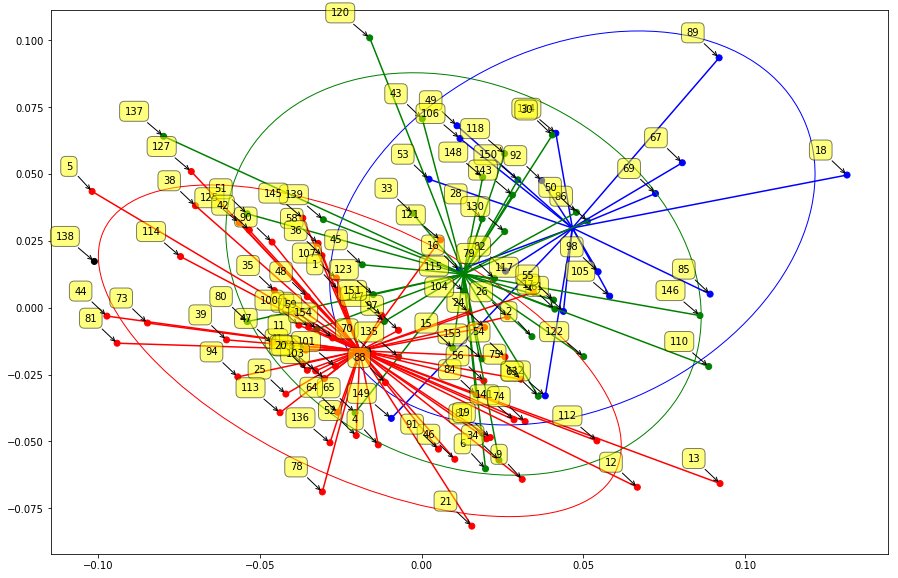

In [15]:
plt.plot(centroid_obesity[0], centroid_obesity[1], ".b", markersize=10)
plt.plot(centroid_healthy[0], centroid_healthy[1], ".r", markersize=10)
plt.plot(centroid_overfat[0], centroid_overfat[1], ".g", markersize=10)

for i in x_out[bmi_l[:,0] =="obese"][:,[0,1]]:
    plt.plot([i[0], centroid_obesity[0]], [i[1], centroid_obesity[1]], "b")

for i in x_out[bmi_l[:,0] =="overfat"][:,[0,1]]:
    plt.plot([i[0], centroid_overfat[0]], [i[1], centroid_overfat[1]], "g")
    
for i in x_out[bmi_l[:,0] =="healthy"][:,[0,1]]:
    plt.plot([i[0], centroid_healthy[0]], [i[1], centroid_healthy[1]], "r")

plt.scatter(x_out[:, 0], x_out[:, 1], marker="o", c=bmi_l[:,1])

plot_ellipse(x_out[bmi_l[:,0] =="healthy"][:,0], x_out[bmi_l[:,0] =="healthy"][:,1], "r" )
plot_ellipse(x_out[bmi_l[:,0] =="overfat"][:,0], x_out[bmi_l[:,0] =="overfat"][:,1], "g" )
plot_ellipse(x_out[bmi_l[:,0] =="obese"][:,0], x_out[bmi_l[:,0] =="obese"][:,1], "b" )

# points = x_out[bmi_l[:,0] =="healthy"][:,[0,1]]
# hull = ConvexHull(x_out[bmi_l[:,0] =="healthy"][:,[0,1]])
# hull.close()
# plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)

# points = x_out[bmi_l[:,0] =="obese"][:,[0,1]]
# hull = ConvexHull(x_out[bmi_l[:,0] =="obese"][:,[0,1]])
# hull.close()
# plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'b--', lw=2)

# points = x_out[bmi_l[:,0] =="overfat"][:,[0,1]]
# hull = ConvexHull(x_out[bmi_l[:,0] =="overfat"][:,[0,1]])
# hull.close()
# plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'g--', lw=2)
# #plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
# plt.show()

for label, x, y in zip(ids, x_out[:,0], x_out[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

In [ ]:
x = np.array(x_out[:, 0], dtype=np.float)
y = bmi
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared: {}".format(r_value**2))
print("p-value: {}".format(p_value))
plt.plot(x , y,".")
plt.xlabel('PCA-0')
plt.ylabel('BMI')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.grid(True)
plt.show()

In [ ]:
x = np.array(x_out[:, 0], dtype=np.float)
y = icc
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared: {}".format(r_value**2))
print("p-value: {}".format(p_value))
plt.plot(x , y,".")
plt.xlabel('PCA-0')
plt.ylabel('ICC')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.grid(True)
plt.show()

In [ ]:
x = np.array(x_out[:, 0], dtype=np.float)
y = ict
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r-squared: {}".format(r_value**2))
print("p-value: {}".format(p_value))
plt.plot(x , y,".")
plt.xlabel('PCA-0')
plt.ylabel('ICT')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.grid(True)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
s = ax.scatter(x_out[:,0],x_out[:,1],c=bmi,marker="o",cmap=plt.cm.Spectral_r,vmax=bmi.min(),vmin=bmi.max())
cbar = plt.colorbar(mappable=s)
cbar.set_label("BMI")
plt.show()